In [1]:
__author__ = 'fbb'
import pylab as pl


import pandas as pd
import os
import json

s = json.load(open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)

%pylab inline


Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib-2.0.0b4+2344.g7b27a1b-py3.5-macosx-10.6-x86_64.egg/matplotlib/__init__.py:910: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
fdny = pd.read_csv(os.getenv("PUI2015")+"/FDNY_Line_Of_Duty_Deaths.csv")
fdny.tail()


Rank              Name        Unit               Date
1164  FIREFIGHTER     JACOB STEIGER   ENGINE 23  SEPTEMBER 8, 1872
1165  FIREFIGHTER    JULIUS FELDMAN   LADDER 43  September 8, 1953
1166   LIEUTENANT  HARRY L. MINITER  LADDER 122  September 8, 1968
1167  FIREFIGHTER       ROBERT MAHL  ENGINE 161  September 9, 1941
1168  FIREFIGHTER    JOHN F. WHELAN  LADDER 162  September 9, 1969

converting dates to datetime

In [5]:
pd.to_datetime(fdny.Date)

0      1924-04-10
1      1934-04-10
2      1948-04-10
3      1952-04-10
4      1969-04-10
5      1896-04-01
6      1917-04-12
7      1917-04-12
8      1901-04-14
9      1927-04-14
10     1965-04-14
11     1977-04-15
12     1868-04-16
13     1916-04-16
14     2012-04-16
15     1939-04-17
16     1957-04-17
17     1968-04-17
18     1924-04-18
19     2002-04-18
20     1930-04-19
21     1945-04-19
22     1945-04-20
23     1970-04-20
24     1951-04-22
25     1910-04-23
26     2005-04-23
27     1905-04-25
28     1912-04-25
29     1935-04-26
          ...    
1139   1921-09-18
1140   1969-09-19
1141   1963-09-02
1142   1945-09-22
1143   1953-09-22
1144   1960-09-22
1145   1911-09-24
1146   1922-09-24
1147   1937-09-24
1148   1951-09-24
1149   1997-09-24
1150   1907-09-25
1151   1927-09-26
1152   1959-09-26
1153   2003-09-27
1154   1907-09-28
1155   1925-09-29
1156   1896-09-30
1157   1938-09-03
1158   1956-09-03
1159   1935-09-05
1160   1944-09-05
1161   1973-09-06
1162   1915-09-07
1163   193

In [8]:
#to remove the hours i apply a function to my converter 
#which extracts the date only from the new datetime object
fdny.Date = pd.to_datetime(fdny.Date).apply( lambda x: x.date() )
fdny.head()

Rank                Name        Unit        Date
0  FIREFIGHTER  THOMAS J. CONNOLLY   LADDER 28  1924-04-10
1  FIREFIGHTER     JOSEPH P. AHERN   ENGINE 48  1934-04-10
2  FIREFIGHTER        JOHN T. RYNN   ENGINE 89  1948-04-10
3  FIREFIGHTER   DENIS J. CORRIDAN  ENGINE 324  1952-04-10
4  FIREFIGHTER      JAMES J. MAINE  ENGINE 156  1969-04-10

## NOTE: for now I have a series of timestamps: this is NOT really a timeseries! I should bin the data in time intervals to have a proper timeseries
## a time series is data as a function of time. By binning these data I have counts of deaths as a function of time. I can keep them at the day level.

In [9]:
FSNYts = fdny[['Date', 'Name']].groupby('Date').count()#.agg('count')
FSNYts.rename(index=str, columns={"Name": "FDNY_deaths"}, inplace=True)
FSNYts.head()

FDNY_deaths
Date                   
1865-08-24            1
1865-11-08            1
1865-12-02            1
1865-12-14            1
1866-05-21            2

Text(0,0.5,'deaths')

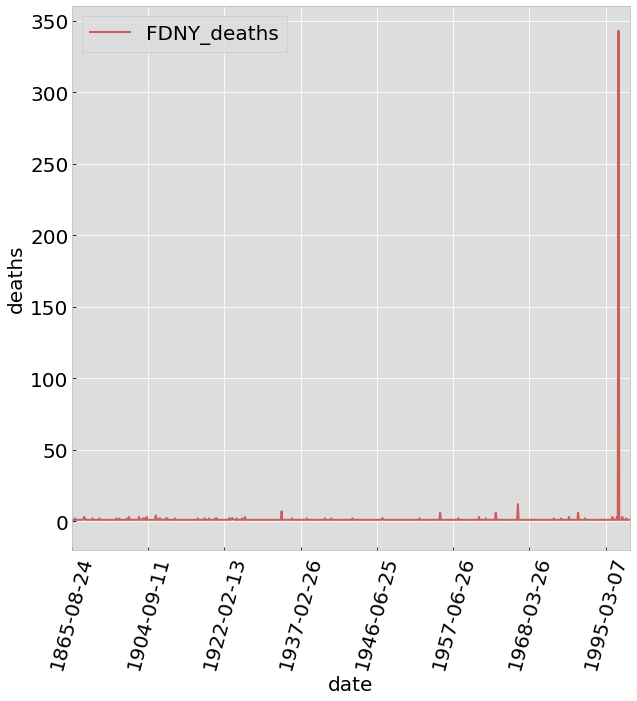

In [10]:
ax = FSNYts.plot(figsize=(10,10), color="IndianRed")

pl.xticks(rotation=75, fontsize=20)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.xlabel("date", fontsize=20)
pl.ylabel("deaths", fontsize=20)

## because all data are scrunched up on the y axis i am going to log space, at this stage only for visualization purposes

Text(0.5,0,'Date')

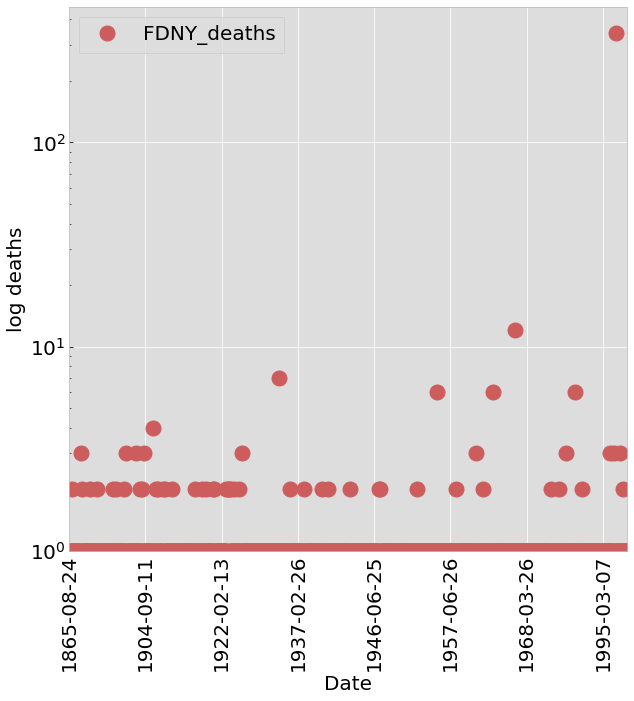

In [11]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".", ms=30, color="IndianRed")
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

Text(0.5,0,'Date')

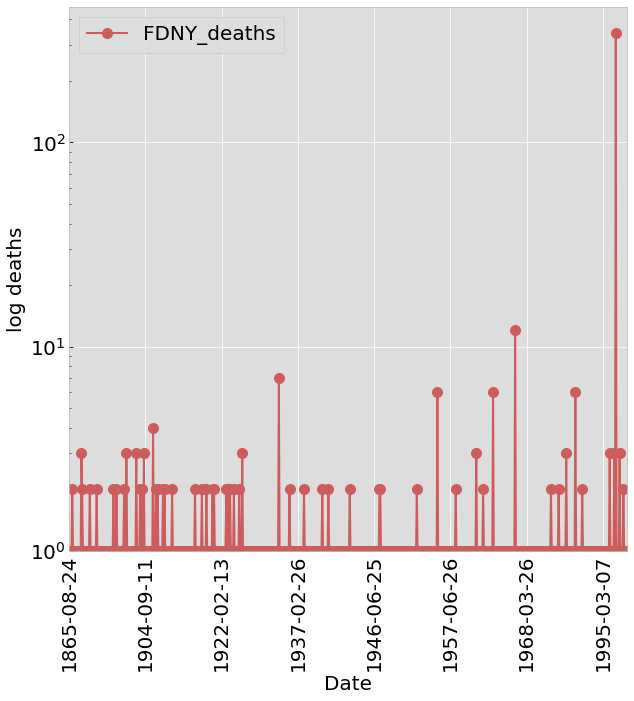

In [12]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20, color="IndianRed")
pl.xticks(rotation=90, fontsize=20)

pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

# The mean and stardand deviation of the time series can be used to set a 3-sigma threshold

## every value that is more then 3 sigma's away from the mean can be flagged as an event

In [13]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("stdev deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(FSNYts.index))

mean deaths by day 1.59
stdev deaths by day 12.64
3-sigma thresholds 39.53 -36.34
earliest datapoint 1865-08-24


Text(0.5,0,'Date')

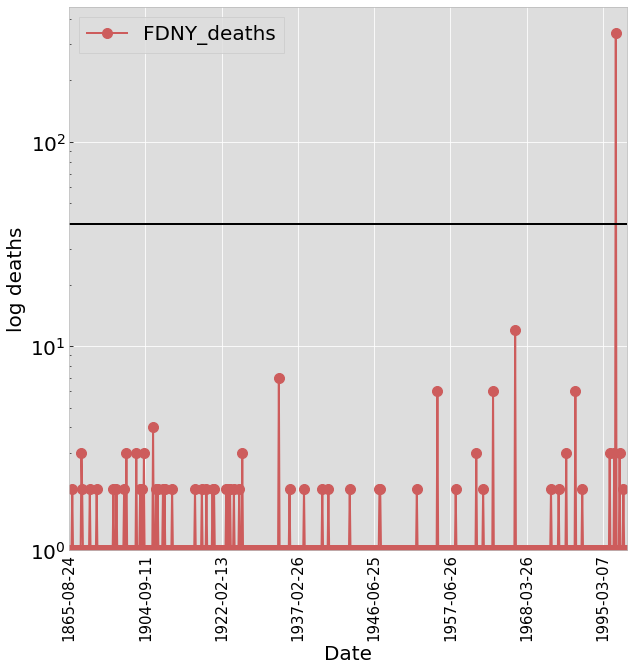

In [14]:
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color='k')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(-20, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("log deaths", fontsize=20)
pl.xlabel("Date", fontsize=20)

In [15]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])]

FDNY_deaths
Date                   
2001-09-11          343

# What other events are significant? We can remove 9/11 and look for more outliers

In [16]:
FSNYts.loc[(FSNYts.FDNY_deaths > thresholds[0])] = np.nan

mean deaths by day 1.13
stdev deaths by day 0.65
earliest datapoint 1865-08-24


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.]),
 <a list of 9 Text xticklabel objects>)

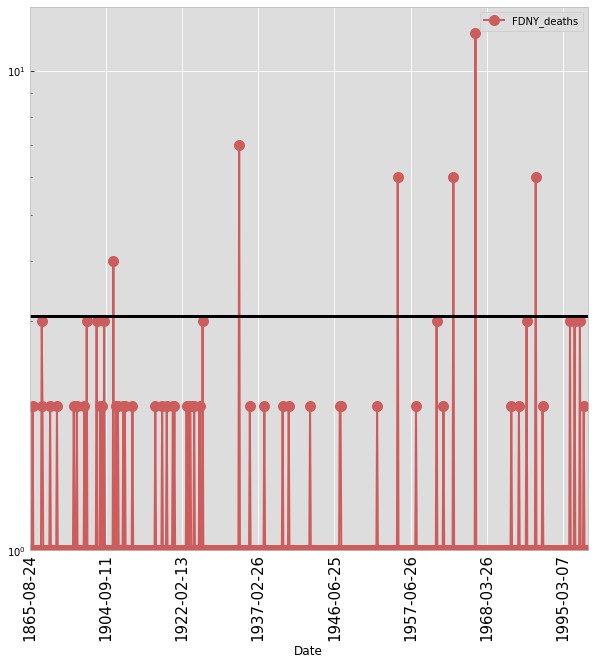

In [17]:
print ("mean deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].mean()))
print ("stdev deaths by day {:.2f}".format(FSNYts['FDNY_deaths'].std()))
thresholds = [FSNYts['FDNY_deaths'].mean() + 3 * FSNYts['FDNY_deaths'].std(), 
              FSNYts['FDNY_deaths'].mean() - 3 * FSNYts['FDNY_deaths'].std()]
print ("earliest datapoint", min(FSNYts.index))
ax = FSNYts.plot(logy=True, figsize=(10,10), style=".-", ms=20, color="IndianRed")
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[0], thresholds[0]], color="Black", lw=3)
pl.xticks(rotation=90, fontsize=15)


In [18]:
FSNYts.loc[(FSNYts.FDNY_deaths>thresholds[0])]

FDNY_deaths
Date                   
1906-03-26            4
1932-08-01            7
1956-04-04            6
1962-10-26            6
1966-10-17           12
1978-08-02            6

[see: http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0]("http://www.nytimes.com/2006/10/17/nyregion/17fire.html?pagewanted=all&_r=0)

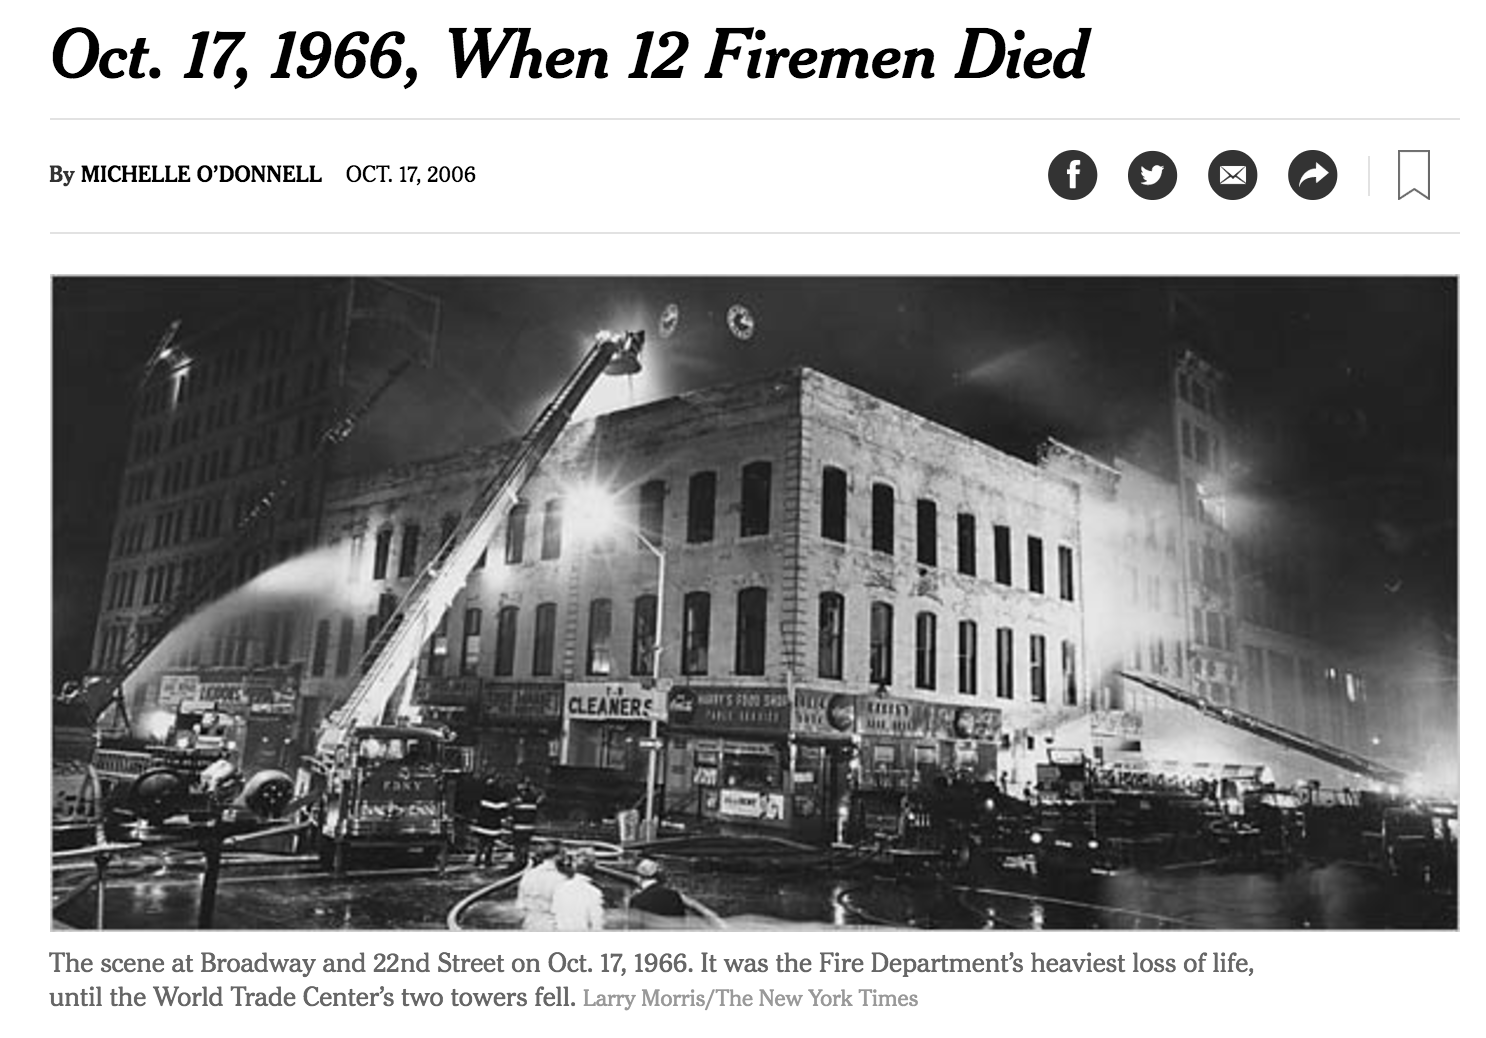

In [19]:
from IPython.core.display import Image, display
display(Image('fdnydeaths.png', width=900, unconfined=True))
